<a href="https://colab.research.google.com/github/vibhahugar/MLlab/blob/main/KNN_%26_SVM_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IRIS**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dev_data/Iris.csv')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [11]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
SepalLengthCm,5.1,4.9,4.7,4.6,5.0
SepalWidthCm,3.5,3.0,3.2,3.1,3.6
PetalLengthCm,1.4,1.4,1.3,1.5,1.4
PetalWidthCm,0.2,0.2,0.2,0.2,0.2
Species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


KNN

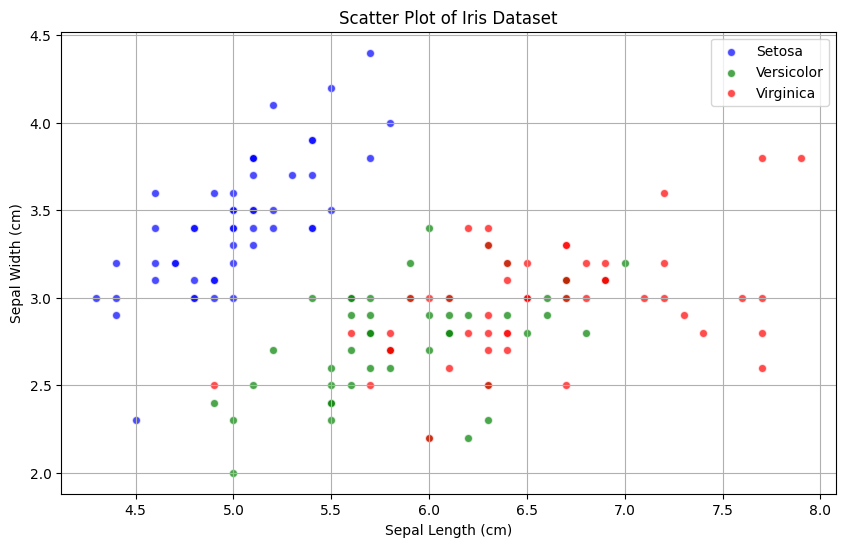

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
iris_df['species'] = iris_df['target'].map(species_map)

plt.figure(figsize=(10, 6))
for species, color in zip(species_map.values(), ['blue', 'green', 'red']):
    species_df = iris_df[iris_df['species'] == species]
    plt.scatter(species_df['sepal length (cm)'], species_df['sepal width (cm)'],
                color=color, label=species, alpha=0.7, edgecolors='w')

plt.title('Scatter Plot of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9777777777777777


In [21]:
X_new = [[5.1, 3.5, 1.4, 0.2], [6.2, 2.9, 4.3, 1.3], [7.6, 3.0, 6.6, 2.1]]  # Example new data
predicted_classes = knn.predict(X_new)
print("Predicted classes for new data:", predicted_classes)

Predicted classes for new data: [0 1 2]


SVM

Features (head): [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target (head): [0 0 0 0 0]


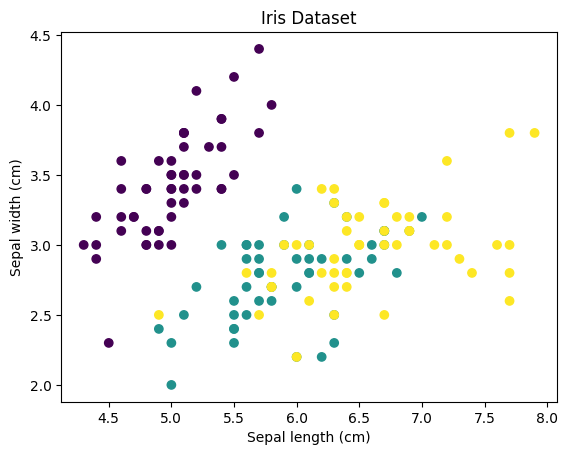

Accuracy: 0.9777777777777777


In [23]:
from sklearn.svm import SVC

iris = load_iris()
X = iris.data
y = iris.target

print("Features (head):", X[:5])
print("Target (head):", y[:5])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Iris Dataset')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)
